In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../../../../Dataset/House Price Prediction Dataset/train (1).csv',
                       keep_default_na= False)
df_test = pd.read_csv('../../../../Dataset/House Price Prediction Dataset/test (1).csv',
                       keep_default_na= False)

In [3]:
# Have NA Category
Valid_cat = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond',
        'PoolQC', 'Fence', 'MiscFeature']

In [4]:
dict1 = {}
for i in df_train.columns.drop('SalePrice'):
    if i not in Valid_cat:
        dict1[i] = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']
    else:
        dict1[i] = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

In [5]:
df_train = pd.read_csv('../../../../Dataset/House Price Prediction Dataset/train (1).csv',
                       keep_default_na= False, na_values= dict1)
df_test = pd.read_csv('../../../../Dataset/House Price Prediction Dataset/test (1).csv',
                       keep_default_na= False, na_values= dict1)

In [6]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [7]:
df_train.isna().sum()[df_train.isna().sum()>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [8]:
df_test.isna().sum()[df_test.isna().sum()>0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

## Outlier Detection:

In [9]:
import matplotlib.pyplot as plt

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

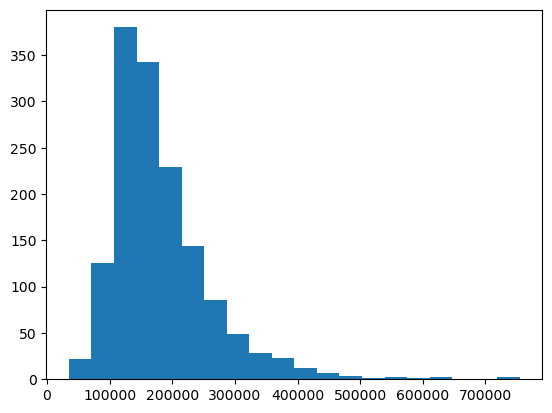

In [10]:
plt.hist(df_train['SalePrice'], bins = 20)

{'whiskers': [<matplotlib.lines.Line2D at 0x27ebba554c0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ebba55a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ebba551f0>],
 'medians': [<matplotlib.lines.Line2D at 0x27ebba68040>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ebba68310>],
 'means': []}

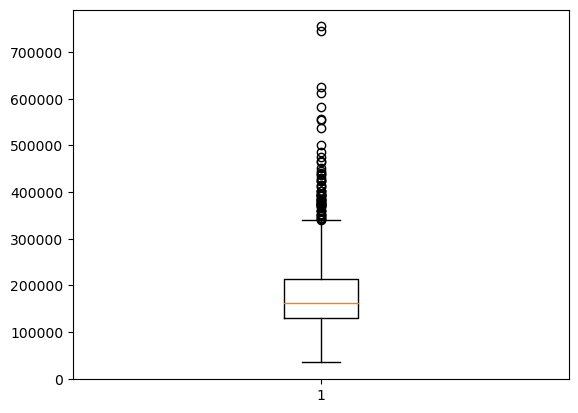

In [11]:
plt.boxplot(df_train['SalePrice'])

In [9]:
z_score = (df_train['SalePrice'] - df_train['SalePrice'].mean())/ df_train['SalePrice'].std()

In [10]:
df_train = df_train[(z_score >-1 ) & (z_score<=1)]

In [11]:
columns_cat = list(df_train.select_dtypes(include = 'object').columns)
columns_num = list(df_train.select_dtypes(exclude = 'object').columns)
columns_num.remove('Id')
columns_num.remove('SalePrice')

## Filling Missing Data - Simple Imputer

In [12]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy= 'most_frequent')
imputer_num = SimpleImputer(strategy= 'median')

imputer_cat.fit(df_train[columns_cat])
imputer_num.fit(df_train[columns_num])

df_train[columns_cat] = imputer_cat.transform(df_train[columns_cat])
df_train[columns_num] = imputer_num.transform(df_train[columns_num])

df_test[columns_cat] = imputer_cat.transform(df_test[columns_cat])
df_test[columns_num] = imputer_num.transform(df_test[columns_num])

In [13]:
df_train.isna().sum()[df_train.isna().sum()>0], df_test.isna().sum()[df_test.isna().sum()>0]

(Series([], dtype: int64), Series([], dtype: int64))

## Encoding for Cat columns :

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_train[columns_cat])

ohe.get_feature_names()

array(['x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl',
       'x1_Pave', 'x2_Grvl', 'x2_NA', 'x2_Pave', 'x3_IR1', 'x3_IR2',
       'x3_IR3', 'x3_Reg', 'x4_Bnk', 'x4_HLS', 'x4_Low', 'x4_Lvl',
       'x5_AllPub', 'x5_NoSeWa', 'x6_Corner', 'x6_CulDSac', 'x6_FR2',
       'x6_FR3', 'x6_Inside', 'x7_Gtl', 'x7_Mod', 'x7_Sev', 'x8_Blmngtn',
       'x8_Blueste', 'x8_BrDale', 'x8_BrkSide', 'x8_ClearCr',
       'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards', 'x8_Gilbert',
       'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes', 'x8_NPkVill',
       'x8_NWAmes', 'x8_NoRidge', 'x8_NridgHt', 'x8_OldTown', 'x8_SWISU',
       'x8_Sawyer', 'x8_SawyerW', 'x8_Somerst', 'x8_StoneBr', 'x8_Timber',
       'x8_Veenker', 'x9_Artery', 'x9_Feedr', 'x9_Norm', 'x9_PosA',
       'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe', 'x9_RRNn',
       'x10_Artery', 'x10_Feedr', 'x10_Norm', 'x10_PosA', 'x10_PosN',
       'x10_RRAe', 'x10_RRAn', 'x10_RRNn', 'x11_1Fam', 'x11_2fmCon',
       'x11_Duplex', 'x11_Twnhs', '

In [16]:
df_train[ohe.get_feature_names()] = ohe.transform(df_train[columns_cat]).toarray()
df_test[ohe.get_feature_names()] = ohe.transform(df_test[columns_cat]).toarray()

## Scaling Num column data - MinMaxScaler:

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_train[columns_num])

df_train[columns_num] = scaler.transform(df_train[columns_num])
df_test[columns_num] = scaler.transform(df_test[columns_num])

# Feature Selection:

In [18]:
col_list = columns_num + list(ohe.get_feature_names()) + ['SalePrice']
corr_values = df_train[col_list].corr()['SalePrice']
corr_values

MSSubClass    -0.020923
LotFrontage    0.219305
LotArea        0.226890
OverallQual    0.685070
OverallCond   -0.167041
                 ...   
x42_Alloca    -0.025203
x42_Family    -0.028074
x42_Normal    -0.049434
x42_Partial    0.195906
SalePrice      1.000000
Name: SalePrice, Length: 292, dtype: float64

In [19]:
selected_col = list(corr_values[(corr_values > 0.1 ) | (corr_values < -0.1)].index)
selected_col.remove('SalePrice')
len(selected_col)

120

## Outlier Detection:

In [20]:
import matplotlib.pyplot as plt

#### Histograph:

(array([ 48.,  62.,  81.,  91., 112.,  88.,  75.,  71.,  56.,  92.,  57.,
         55.,  39.,  34.,  40.,  33.,  35.,  31.,  22.,  23.]),
 array([101800., 109710., 117620., 125530., 133440., 141350., 149260.,
        157170., 165080., 172990., 180900., 188810., 196720., 204630.,
        212540., 220450., 228360., 236270., 244180., 252090., 260000.]),
 <BarContainer object of 20 artists>)

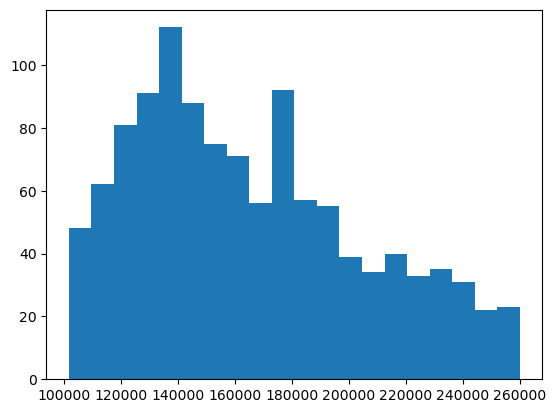

In [21]:
plt.hist(df_train['SalePrice'], bins = 20)

#### Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1280141cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1280142e370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1280141cac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1280142e910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1280142ebe0>],
 'means': []}

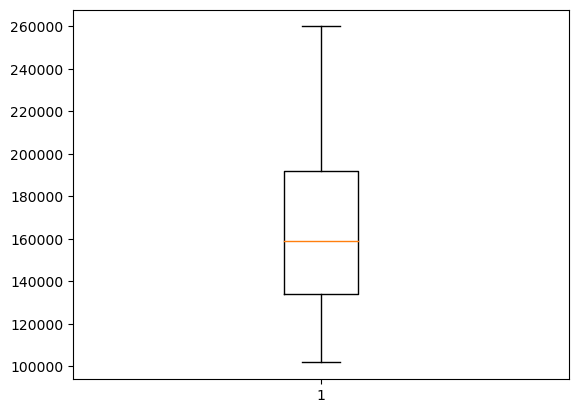

In [22]:
plt.boxplot(df_train['SalePrice'])

## Building Model:


In [19]:
# selected_col = columns_num + list(ohe.get_feature_names()) # IF FEATURE SELECTION NOT USed then use this line
X = df_train[selected_col]
y = df_train['SalePrice']

### Linear Regression:


In [95]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X,y)

LinearRegression()

In [96]:
model_lr.score(X,y)

0.9139650921300488

In [97]:
yp_lr = model_lr.predict(df_test[selected_col])

In [98]:
yp_lr

array([122176., 147648., 191168., ..., 183872., 135232., 213440.])

In [99]:
df_test['SalePrice'] = yp_lr

In [100]:
df_test[['Id','SalePrice']].to_csv('model_lr_sub2.csv', index= False)

### KNeighborsRegressor Model

In [35]:
from sklearn.neighbors import KNeighborsRegressor
model_KNR = KNeighborsRegressor(n_neighbors=11)
model_KNR.fit(X,y)
model_KNR.score(X,y)

0.7020918326430577

In [36]:
yp_KNR = model_KNR.predict(df_test[selected_col])

In [37]:
df_test['SalePrice'] = yp_KNR
df_test[['Id','SalePrice']].to_csv('sub2_knr.csv',index = False)

### SVM  Model:

In [27]:
from sklearn.svm import SVR

In [28]:
model_svr = SVR(kernel='poly')
model_svr.fit(X,y)
model_svr.score(X,y)

-0.04773563672953851

In [29]:
yp_svr = model_svr.predict(df_test[selected_col])

In [30]:
df_test['SalePrice'] = yp_svr
df_test[['Id','SalePrice']].to_csv('sub2_svr.csv',index = False)

## Random Forest:

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [28]:
params = {'n_estimators': [10,20,30,40,50,60,70], 'max_depth':[2,3,4,5],"min_samples_leaf":[2,3,4,5]}
gridcv = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5,verbose=0,scoring='accuracy')

In [29]:
gridcv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70]},
             scoring='accuracy')

In [30]:
gridcv.best_estimator_

RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [31]:
model_rf = RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [32]:
model_rf.fit(X,y)

RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [33]:
yp_rf = model_rf.predict(df_test[selected_col])
df_test['SalePrice'] = yp_rf

In [34]:
df_test[['Id','SalePrice']].to_csv('sub_outlier_rf.csv', index= False)

## GradientBoostingRegressor Model:

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
model_gbr = GradientBoostingRegressor(n_estimators=99)
model_gbr.fit(X,y)
model_gbr.score(X,y)

0.9666405032958288

In [31]:
yp_gbr = model_gbr.predict(df_test[selected_col])
df_test['SalePrice'] = yp_gbr
df_test[['Id','SalePrice']].to_csv('gbr1.csv', index= False)